# Penalty Functions: Example of How $L_p$ Penalty Changes Loss Optima

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
from ipywidgets import interact,interact_manual, FloatSlider

In [2]:
# Generate noisy data from a line

######################
# Change Me!
a_true = 5
b_true = 2
noise = 0.001
#################

true_func = lambda x: a_true*x+b_true

num_samples = 50
x = (np.random.rand(num_samples)-0.5)*20
y = true_func(x)+np.random.normal(scale=noise,size=num_samples)

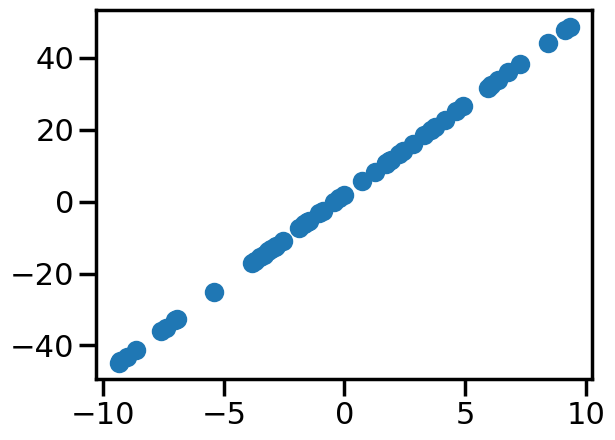

In [9]:
plt.figure()
plt.scatter(x,y)
plt.show()

In [10]:
from numpy.linalg import norm
def loss(a,b,alpha,order=2):
    #return np.linalg.norm(y - (a*x+b),ord=2)
    #return np.average((y - (a*x+b))**2) + alpha*(a**2) + alpha*(b**2)
    return np.average((y - (a*x+b))**2) + alpha*norm([a,b],ord=order)

#example
loss(a=5,b=2,alpha=0)

np.float64(1.1566296403607304e-06)

In [11]:
A, B = np.meshgrid(np.linspace(-10, 10, 201), np.linspace(-10, 10, 201))
N,M = A.shape
floss = np.vectorize(loss)

def generate_new_data(a=5,b=5):
    x = (np.random.rand(num_samples)-0.5)*20
    #y = true_func(x)+np.random.normal(scale=1,size=num_samples)
    y = a*x+b+np.random.normal(scale=1,size=num_samples)
    return x,y

def generate_z_grid(alpha,order):
    Z_noalpha = floss(A.flatten(),B.flatten(),0).reshape((N,M))
    alpha=alpha
    Z = floss(A.flatten(),B.flatten(),alpha,order)
    min_ind = np.argmin(Z)
    Amin = A.flatten()[min_ind]
    Bmin = B.flatten()[min_ind]
    Z = Z.reshape((N,M))
    return Z_noalpha, Z, Amin, Bmin

get_levels = lambda z: [np.percentile(z.flatten(),i) for i in [0,0.5,1,2,5,10,15,30,40,50,75,95,100]]
#levels = [np.percentile(allz,i) for i in [0,0.5,1,2,5,10,15,30,40,50,75,95,100]]
#levels = [np.percentile(allz,i) for i in np.logspace(-2,3,10,base=3)]

def plot_objective(alpha=0,order=2):
    Z_noalpha, Z, Amin, Bmin = generate_z_grid(alpha,order)
    plt.figure(figsize=(7,7))
    plt.vlines(0,-10,10,alpha=0.25,colors='r',linestyles='solid')
    plt.hlines(0,-10,10,alpha=0.25,colors='r',linestyles='solid')
    plt.contour(A,B,Z_noalpha,10,levels=get_levels(Z_noalpha),linestyles='solid',cmap='Greys_r',alpha=0.05)
    plt.contour(A,B,Z,10,levels=get_levels(Z),linestyles='solid',cmap='Greys_r',alpha=0.5)
    plt.scatter([0],[0],marker='D',s=50,c='r')
    plt.scatter([a_true],[b_true],marker='*',s=400)
    plt.scatter([Amin],[Bmin])
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title('Optima: a={:.2f}, b={:.2f}'.format(Amin,Bmin))
    plt.show()

In [ ]:
interact(plot_objective,
         alpha=np.logspace(-2,5,8),
         order=FloatSlider(min=0,max=10,step=0.1,continuous_update=False,value=2.0))

interactive(children=(Dropdown(description='alpha', options=(np.float64(0.01), np.float64(0.1), np.float64(1.0…

<function __main__.plot_objective(alpha=0, order=2)>

# How about plotting the path?
For this, let's try plotting, for different norm orders, the path that the coefficients take as we set alpha = 0 (no regularization) to a large number (essentially fully regularized):

In [13]:
from scipy.optimize import fmin
import warnings
warnings.simplefilter('ignore', RuntimeWarning)

alpha_range = np.logspace(-1,5,14)
order_range = [0,0.25,.5,.75,1,1.5,2,3,5,10,20,100]

Al = len(alpha_range)
Ol = len(order_range)
results = np.zeros((Al,Ol,2))

for j,o in enumerate(order_range):
    prev_opt = [5,5]
    for i,a in enumerate(alpha_range):
        f = lambda x: loss(x[0],x[1],alpha=a,order=o)
        x_opt = fmin(f,prev_opt,disp=False)
        results[i,j] = x_opt
        prev_opt = x_opt

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


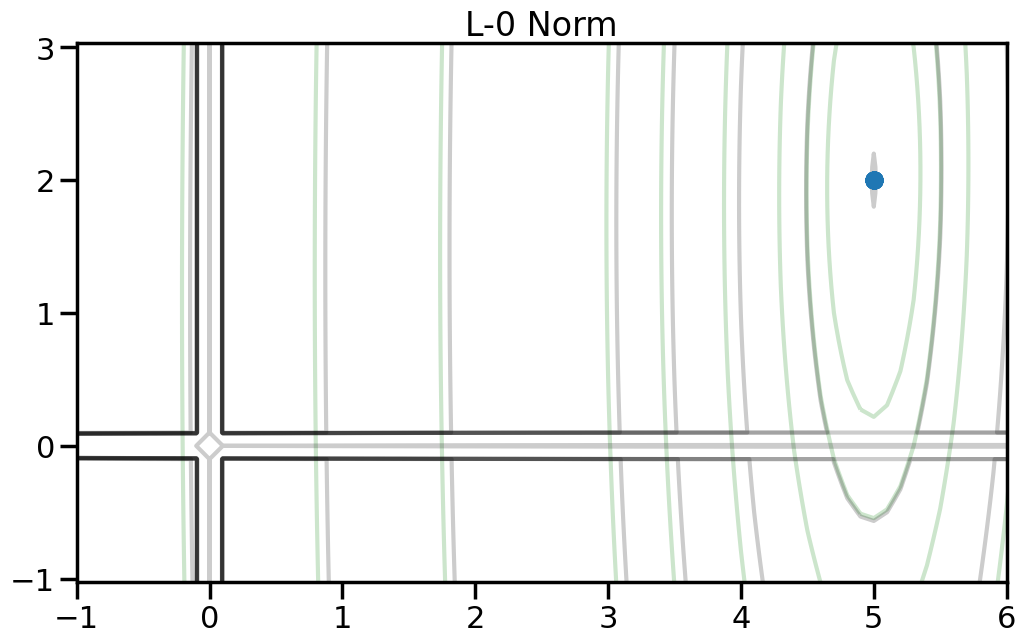

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


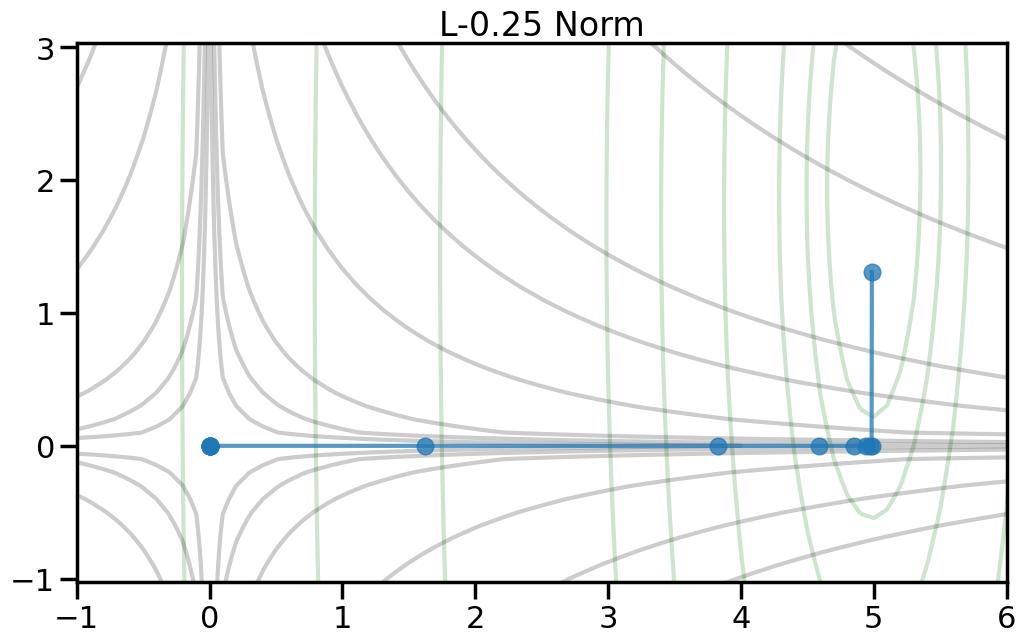

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


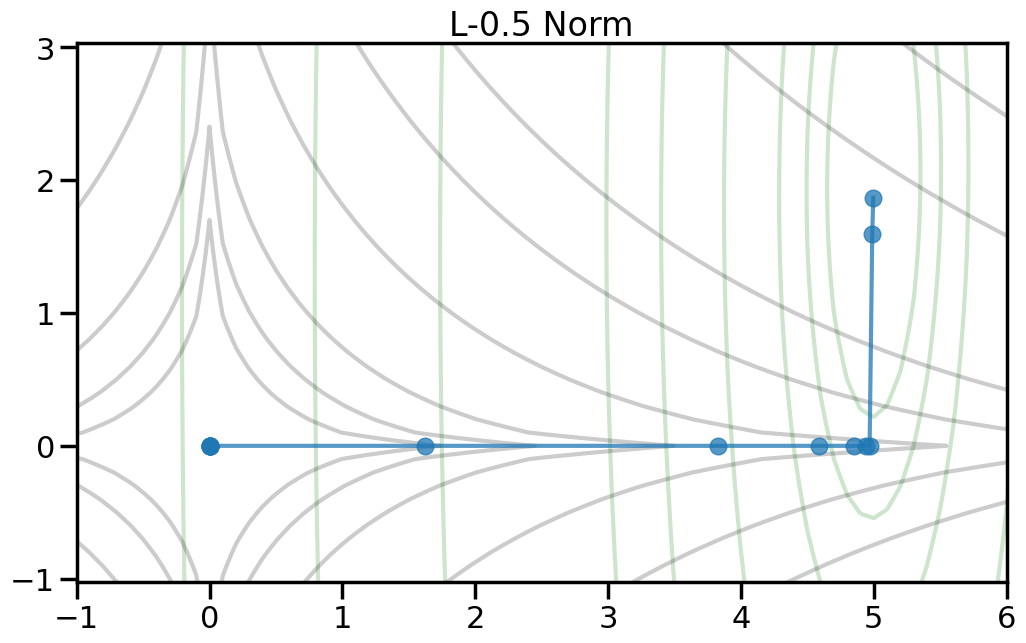

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


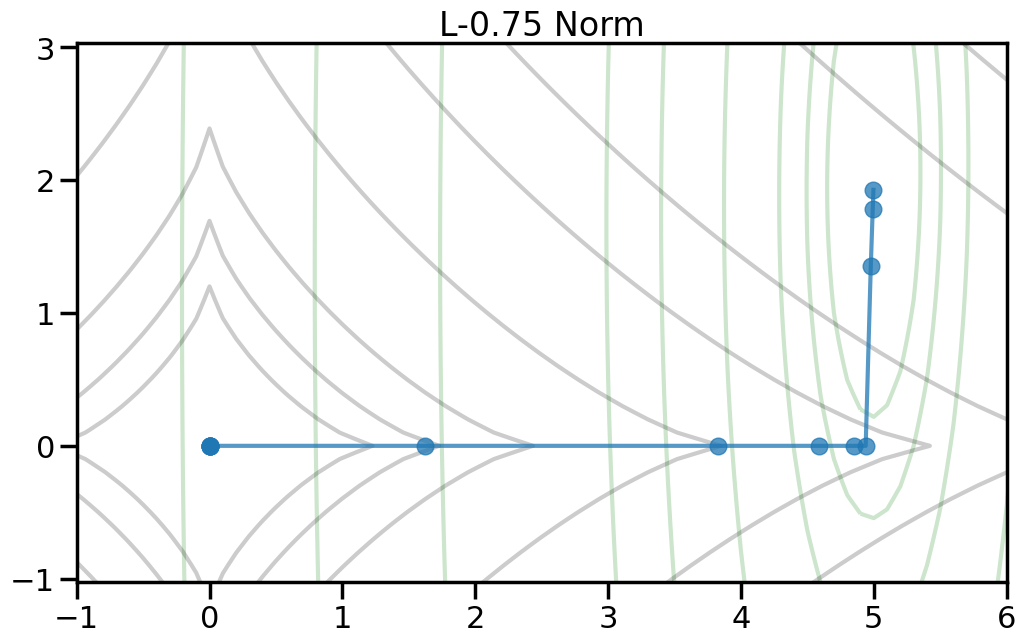

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


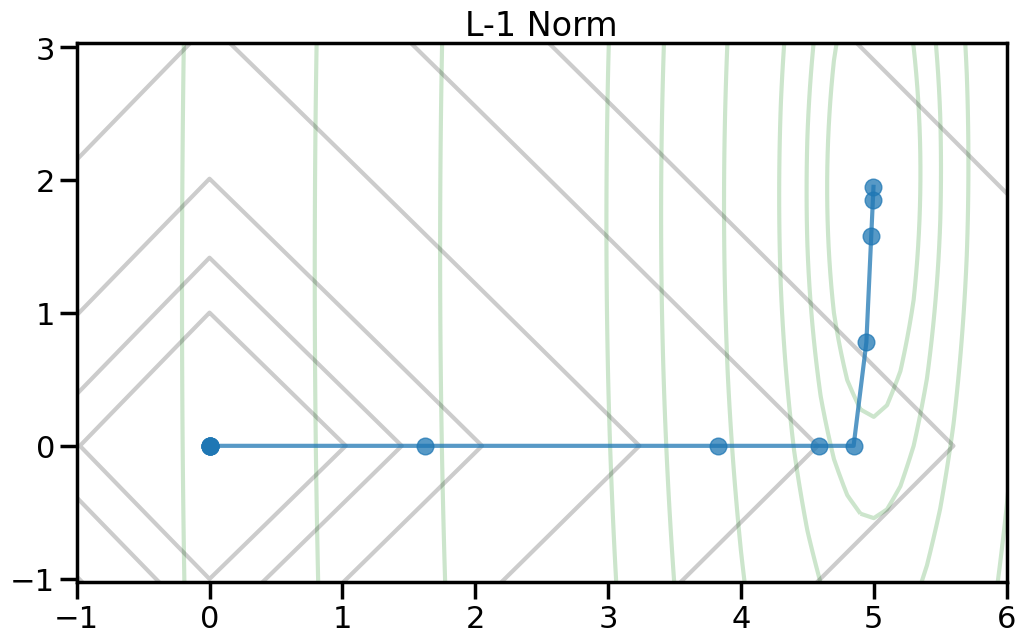

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


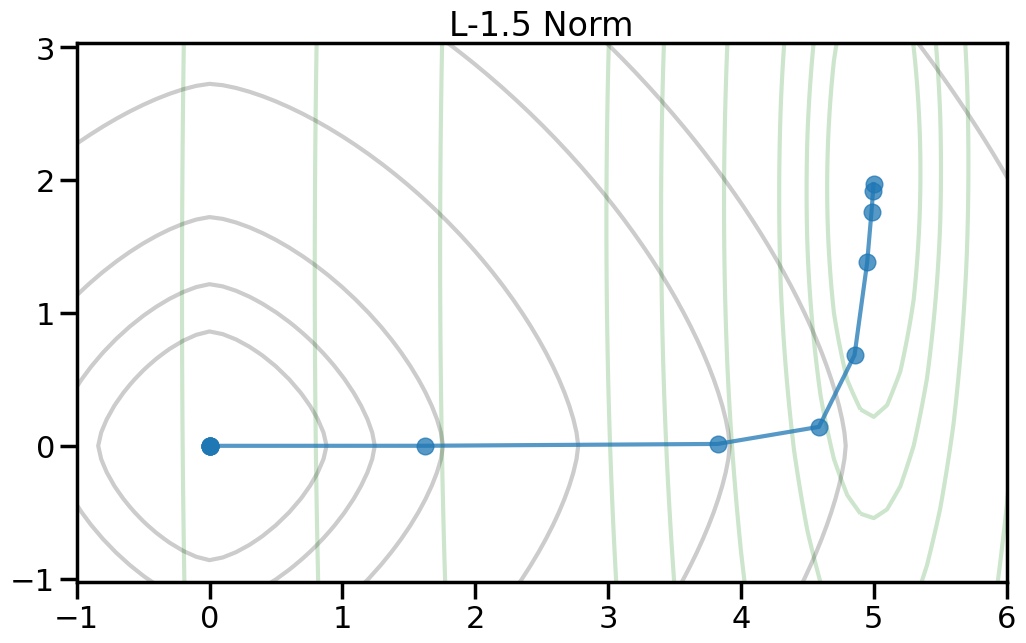

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


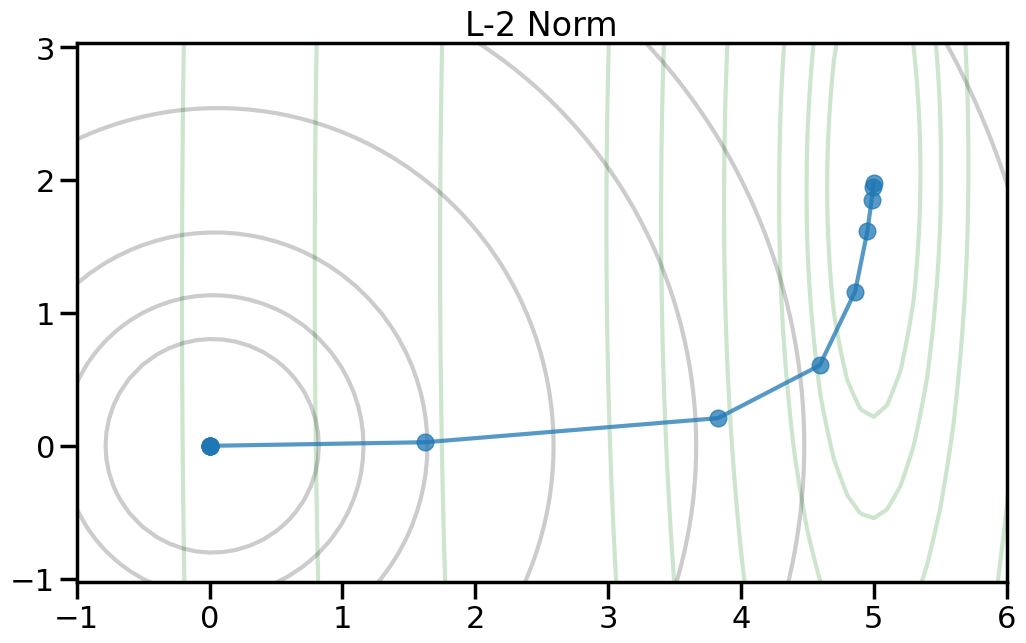

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


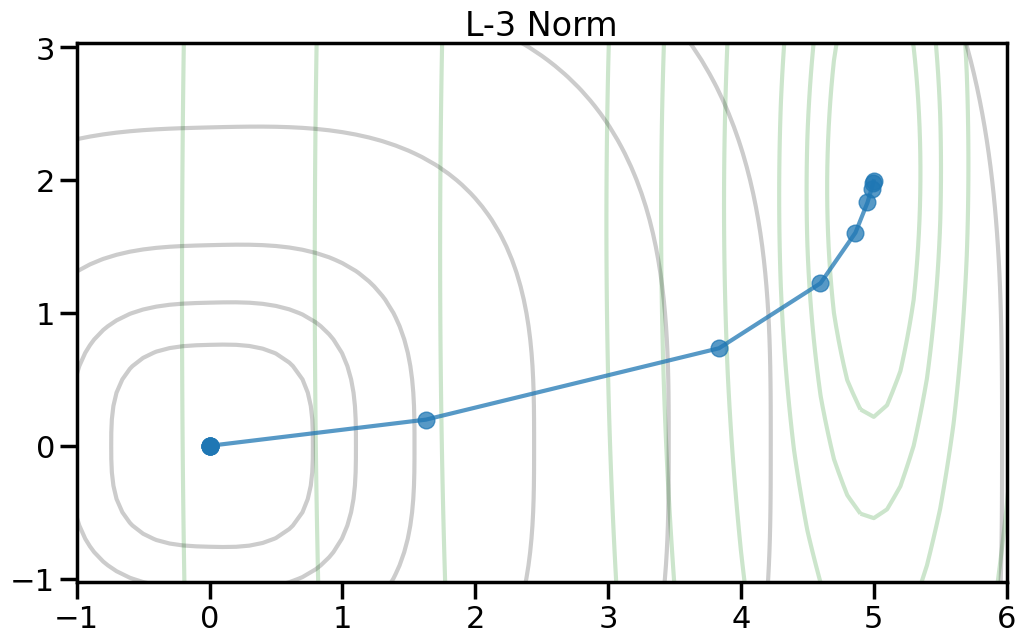

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


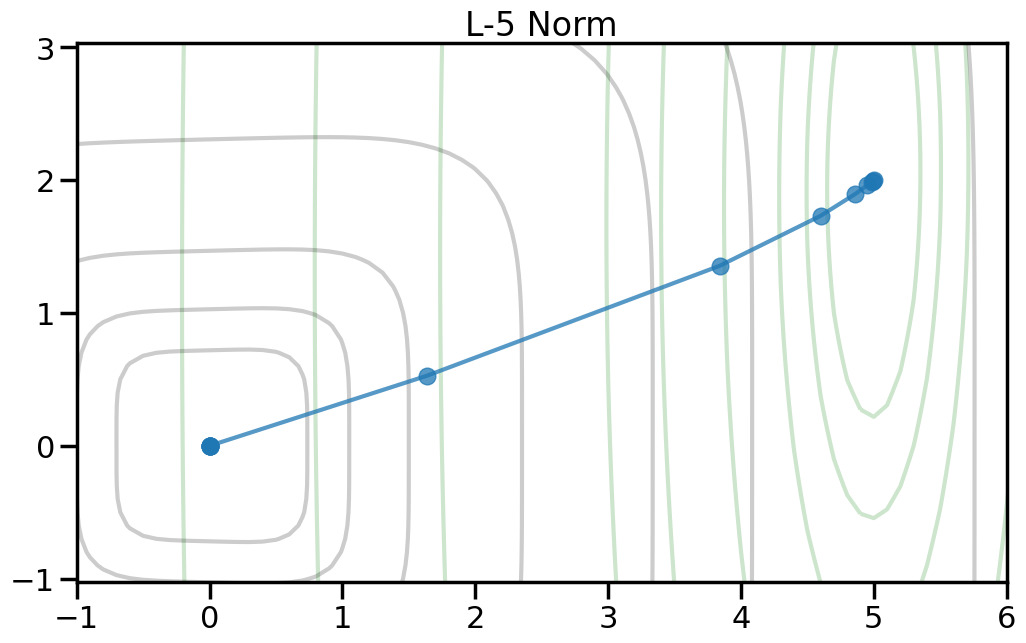

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


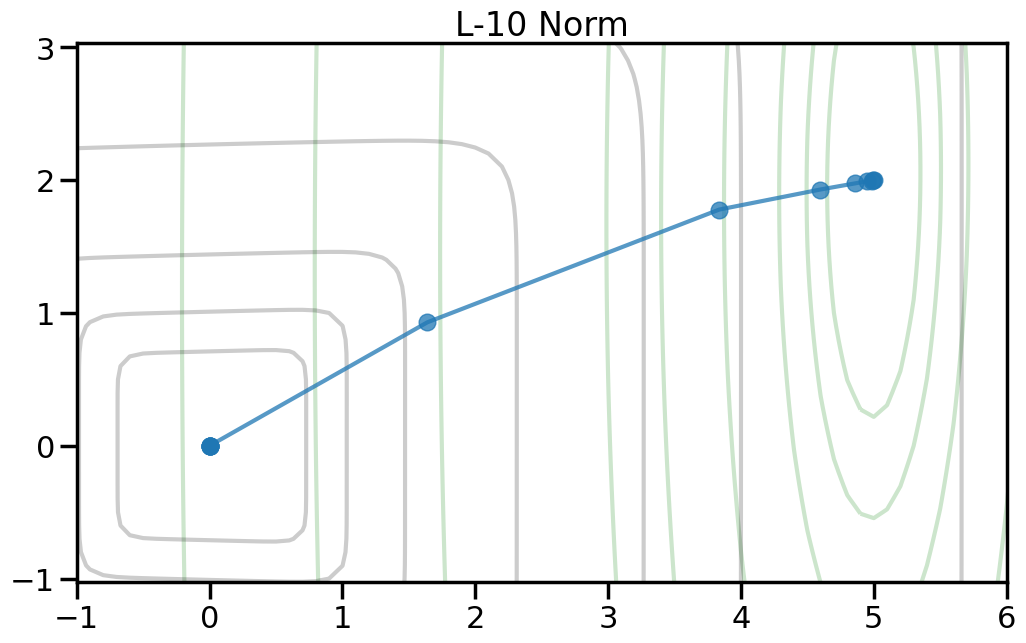

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


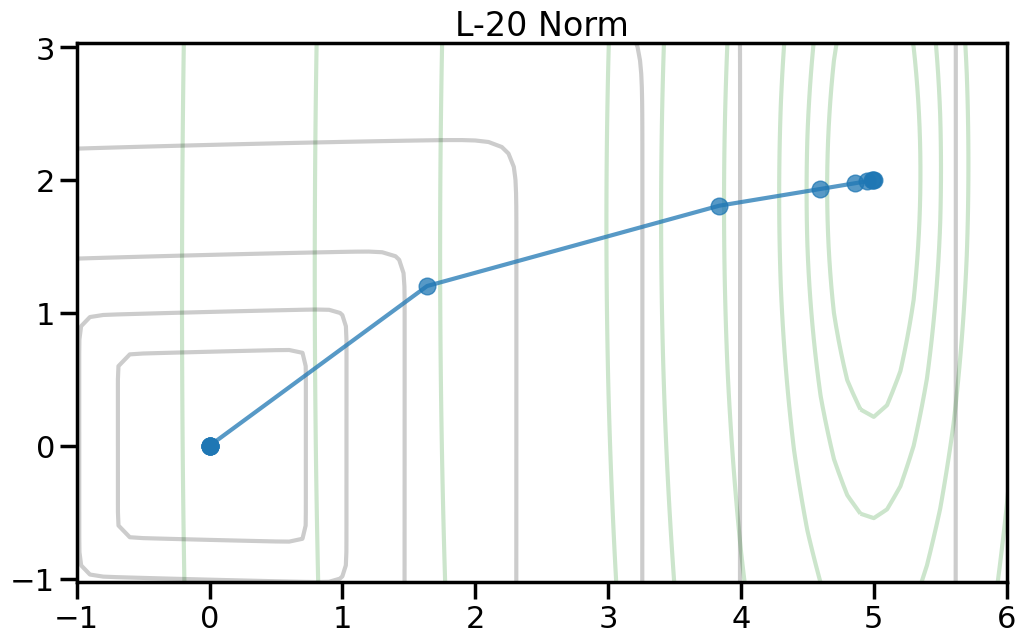

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


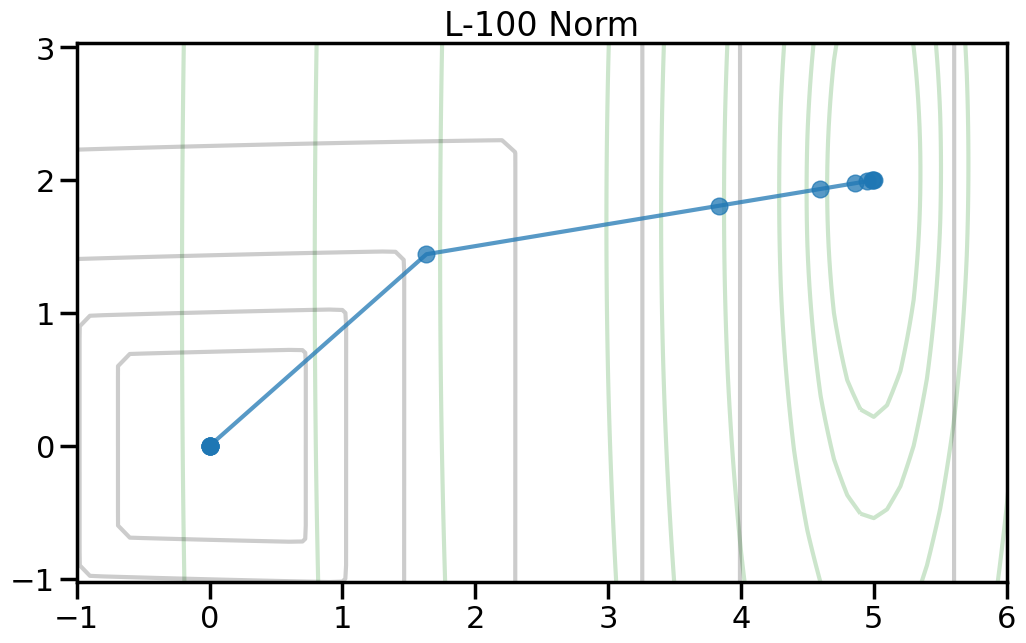

In [14]:
for j,o in enumerate(order_range):
    fig = plt.figure(figsize=(12,7))
    Z_noalpha, Z, Amin, Bmin = generate_z_grid(10000,o)
    plt.contour(A,B,Z_noalpha,10,levels=get_levels(Z_noalpha),linestyles='solid',alpha=0.2,colors='g')
    plt.contour(A,B,Z,10,levels=get_levels(Z),linestyles='solid',alpha=0.2,colors='k')
    plt.plot(results[:,j,0],results[:,j,1],marker='o',alpha=0.75)
    plt.title('L-{} Norm'.format(o))
    plt.axis('equal')
    plt.xlim([-1,6])
    plt.ylim([-1,3])
    plt.show()

# Summary of How to Select a Loss or Penalty function
In class, we reviewed a couple of different forms of loss functions and penalty functions and talked a bit about the criteria for selecting them. Below is a very short summary of these.

## Loss Functions for Regression:
* If you have no prior knowledge of the function or data, then selecting an L2 type loss (like the Mean Squared Error) is reasonable. When data nicely behaves w.r.t. a linear model (e.g., features are uncorrelated, errors in the linear model are uncorrelated, have equal variances, and expected error of zero around the linear model, etc.) then a Linear Model with an L2 Loss is the Best Linear Unbiased Estimate (BLUE) according to the [Gauss-Markov Theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem).
* If you have reason to believe that the data will have outliers or otherwise need to be robust to spurious large samples, then L2 loss will not be robust to this (as we saw in Lecture). For this, moving to an L1 type loss (like an Absolute Loss or Huber loss) will make the model less sensitive to outliers. It is one approach to handling [Robust Regression](https://en.wikipedia.org/wiki/Robust_regression).
* If you need to have the model's loss be dominated only by a handful of points/data as opposed to all of the data, then epsilon-insensitive loss is appropriate since many points well-fit by the model will have "zero" loss. For things like Linear Models, this has limited usefulness right now. However, when we "kernalize" Linear models in "Kernels" week, you will see that this is a big deal, and it is what gives rise to the "Support Vector" part of "Support Vector Machines". Specifically, decreasing epsilon towards zero increases the number of needed Support Vectors (can be a bad thing), and increasing epsilon can decrease the number of needed Support Vectors (can be a good thing). This will make more sense in a few week's time.

## Loss Functions for Classification:
* Zero-One loss sounds nice, but is not useful in practice, since it is not differentiable.
* [Perceptron loss](https://en.wikipedia.org/wiki/Perceptron), while of historical importance, is not terribly useful in practice, since it does not converge to a unique solution and an SVM (i.e., Hinge Loss below) has all of the same benefits.
* If you need a simple linear model which outputs actual probabilities (like, 95% sure the component has failed), then the log-loss does this, via [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) and allows you to calculate classification probabilities in closed form.
* If you want something that [maximizes the margin](https://en.wikipedia.org/wiki/Margin_(machine_learning)) of the classifier, then the Hinge Loss can get close to this. It is the basis of [Linear Support Vector Machines](https://en.wikipedia.org/wiki/Support_vector_machine#Linear_SVM)

## Penalty Terms (Lp Norms) for Linear Models:
* $L_2$ Norm penalties on the weight vector essentially "shrink" the weights towards zero as you increase the penalty weight. Adding this kind of penalty to a linear model has different names, depending on which community of people you are talking with. Some of these other names are: (1) [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization), (2) Ridge Regression, (3) $L_2$ Shrinkage Estimators, or (4) Gaussian Weight Priors. I find looking at the penalty term itself more helpful at understanding the effects rather than memorizing the different names.
* $L_0$ Norm penalties, while conceptually interesting since they essentially "count" entries in the weight vector, are not practically useful since they are not differentiable and are thus difficult to optimize.
* $L_1$ Norm penalties are a compromise between $L_2$ and $L_0$ in that they promote sparsity in the weights (some weights will become zero) but are (largely) differentiable, meaning that you can meaningfully optimize them (unlike $L_0$). Shrinking certain weights to zero in this way can be useful when (1) you are in the $n \ll p$ regime (many more features than data points) where the model is underdetermined and (2) you want some degree of model interpretability (it sets many weights to zero). Some of these other names for this kind of linear regression with this penalty are the [LASSO (least absolute shrinkage and selection operator)](https://en.wikipedia.org/wiki/Lasso_(statistics)). 
* $L_\infty$ (where p is really large) essentially penalize the size of the biggest element of the weight vector (w). While there are some niche instances where this kind of norm is useful for a Loss function (e.g., [Chebyshev Regression](https://en.wikipedia.org/wiki/Minimax_approximation_algorithm)), I have rarely seen meaningful use cases in practice where this makes sense as a penalty term for the weight vector.
* Combinations of penalties. For example, a common combination is combining both an $L_2$ and $L_1$ penalty on the weights, as in: $\Omega(w) = \alpha ||w||_2 + \beta ||w||_1$. This particular combination is called ["Elastic Net"](https://en.wikipedia.org/wiki/Elastic_net_regularization) and exhibits some of the good properties of $L_2$ penalities with the sparsity inducing properties of $L_1$ regularization.